# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv('api.env')

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
crypto_amt = 10000
crypto_amt

10000

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
response_btc=requests.get(btc_url).json()
btc_symbol=response_btc['data']['1']['quotes']['USD']['price']

# Fetch current ETH price
response_eth=requests.get(eth_url).json()
eth_symbol=response_eth['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
my_btc=1.2
my_eth=5.3
my_btc_value=btc_symbol*my_btc
my_eth_value=eth_symbol*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47064.00
The current value of your 5.3 ETH is $15221.23


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")


# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
start_date = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2020-05-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio

# Reorganize the DataFrame
# Separate ticker data
agg = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis=1)
spy = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis=1)




# Concatenate the ticker DataFrames
df_portfolio = pd.concat([agg,spy],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937

In [9]:
# Pick AGG and SPY close prices
closing_prices_df = pd.DataFrame()
closing_prices_df["AGG"] = df_portfolio["AGG"]["close"]
closing_prices_df["SPY"] = df_portfolio["SPY"]["close"]

closing_prices_df.index = closing_prices_df.index.date
closing_prices_df.index.name = 'timestamp'
closing_prices_df.iloc[0]["AGG"]
agg_close_price = closing_prices_df.iloc[0]["AGG"]
spy_close_price = closing_prices_df.iloc[0]["SPY"]

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [10]:
# Compute the current value of shares
my_spy_value = my_spy * spy_close_price
my_agg_value = my_agg * agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $14139.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [26]:
# Set monthly household income
monthly_income = 120000

# Consolidate financial assets data
crypto = my_btc_value + my_eth_value
shares = my_spy_value + my_agg_value
crypto
shares

list_con = {'crypto': crypto,
            'shares': shares}

# Create savings DataFrame
df_savings = pd.DataFrame([list_con])
df_savings = df_savings.T
df_savings = df_savings.rename(columns={df_savings.columns[0]:'amount'})

# Display savings DataFrame
display(df_savings)

,amount
crypto,62285.229
shares,37513.500


In [14]:
# Plot savings pie chart
df_savings.pie()

AttributeError: 'DataFrame' object has no attribute 'pie'

In [29]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = crypto + shares
total_savings

# Validate saving health
if total_savings > emergency_fund:
    print("congrats, you have enough money in your fund!")
elif total_savings == emergency_fund:
    print("congrats, you have reached your financial goals!")
else:
    print(r'you need ',emergency_fund - total_savings,' to reach your goal')
    
    

you need  260201.271  to reach your goal


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [30]:
# Get 5 years' worth of historical data for SPY and AGG
df_portfolio1 = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

df_portfolio1

# Reorganize the DataFrame
# Separate ticker data
agg1 = df_portfolio1[df_portfolio1['symbol']=='AGG'].drop('symbol', axis=1)
spy1 = df_portfolio1[df_portfolio1['symbol']=='SPY'].drop('symbol', axis=1)



# Concatenate the ticker DataFrames
df_stock_data = pd.concat([agg,spy],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937

In [31]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [32]:
# Printing the simulation input data
MC_thirtyyear.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2020-05-01 04:00:00+00:00       24395  116.846123          NaN  285.16   
2020-05-04 04:00:00+00:00       15545  116.960599     0.000856  280.46   
2020-05-05 04:00:00+00:00       15150  116.879635    -0.000769  286.66   
2020-05-06 04:00:00+00:00       20233  116.426742    -0.004021  288.01   
2020-05-07 04:00:00+00:00       15964  116.641830     0.003093  287.79   

                                                                              \
                               high       low   close     volume trade_count   
timestamp                                                                      
2020-05-01 04:00:00+00:00  290.6572  281.5200  282.79  125180028      639987   
2020-05-04 04:00:00+00:00  283.9000  279.1300  283.57   80883545      460682   
2020-05-05 04:00:00+00:00  289.2500  283.7134  286.19   79569939      459764   
2020-05-06 04:00:00+00:00  288.4600  283.7800  284.25   74234197      436223   
2020-05-07 04:00:00+00:00  289.7800  287.1300  287.68   75250852      422689   

                                                    
                                 vwap daily_return  
timestamp                                           
2020-05-01 04:00:00+00:00  284.092832          NaN  
2020-05-04 04:00:00+00:00  281.765323     0.002758  
2020-05-05 04:00:00+00:00  287.400201     0.009239  
2020-05-06 04:00:00+00:00  286.083037    -0.006779  
2020-05-07 04:00:00+00:00  287.989937     0.012067

In [33]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_thirtyyear.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\CU-VIRT-FIN-PT-03-2022-U-B\Class Folder\CU-VIRT-FIN-PT-03-2022-U-B\05-Financial-Simulations-and-APIs\Homework\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,1.014074e+00,1.002252e+00,1.015192e+00,9.997269e-01,9.987968e-01,1.000678e+00,1.007081e+00,1.009677e+00,1.001494e+00,1.009773e+00,...,1.005006e+00,1.004477e+00,1.004269e+00,1.003420e+00,1.006316e+00,9.982983e-01,1.010468e+00,1.000045e+00,9.967579e-01,9.969414e-01
2,1.029006e+00,1.005912e+00,1.018603e+00,1.010114e+00,1.008343e+00,9.861918e-01,1.014258e+00,1.020573e+00,1.009726e+00,1.007966e+00,...,1.003726e+00,1.016974e+00,1.011672e+00,9.979811e-01,1.012972e+00,9.953606e-01,1.018460e+00,9.957536e-01,9.959270e-01,1.004130e+00
3,1.033426e+00,1.000814e+00,1.016247e+00,1.009606e+00,1.009870e+00,9.851716e-01,1.019547e+00,1.022211e+00,1.003331e+00,1.010680e+00,...,1.007549e+00,1.017919e+00,1.017305e+00,9.996937e-01,1.024445e+00,1.000254e+00,1.019619e+00,1.005629e+00,1.006754e+00,1.011181e+00
4,1.042721e+00,1.005585e+00,1.026274e+00,1.008250e+00,1.015888e+00,9.856490e-01,1.020358e+00,1.038417e+00,1.001278e+00,1.018355e+00,...,1.019078e+00,1.012877e+00,1.014662e+00,9.986065e-01,1.029160e+00,1.007358e+00,1.025725e+00,1.003448e+00,1.012641e+00,1.017112e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,1.471240e+08,2.133696e+08,1.557317e+08,2.068730e+08,2.337180e+08,1.896547e+08,1.828373e+08,1.733586e+08,1.607599e+08,1.338706e+08,...,1.159075e+08,1.190653e+08,2.116688e+08,1.295166e+08,3.179727e+08,9.007120e+07,1.988765e+08,7.768401e+07,1.760110e+08,2.785552e+08
7557,1.481620e+08,2.154382e+08,1.557714e+08,2.058883e+08,2.346214e+08,1.900280e+08,1.822686e+08,1.742416e+08,1.622786e+08,1.339243e+08,...,1.138918e+08,1.195736e+08,2.107631e+08,1.301305e+08,3.174030e+08,9.070069e+07,1.998994e+08,7.745053e+07,1.754949e+08,2.797784e+08
7558,1.486571e+08,2.167209e+08,1.563641e+08,2.055961e+08,2.364437e+08,1.897988e+08,1.822474e+08,1.751339e+08,1.620070e+08,1.347903e+08,...,1.143245e+08,1.209552e+08,2.113183e+08,1.311143e+08,3.168305e+08,9.037934e+07,2.001546e+08,7.787307e+07,1.761781e+08,2.801415e+08
7559,1.495560e+08,2.179966e+08,1.581842e+08,2.068196e+08,2.362961e+08,1.914115e+08,1.823879e+08,1.759778e+08,1.624953e+08,1.354059e+08,...,1.138542e+08,1.212321e+08,2.125535e+08,1.312145e+08,3.209300e+08,9.078696e+07,1.995043e+08,7.832525e+07,1.756952e+08,2.798452e+08


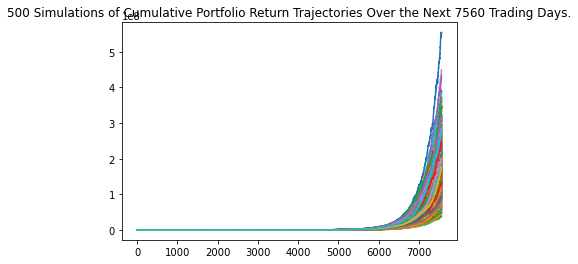

In [34]:
# Plot simulation outcomes
MC_sim_line_plot = MC_thirtyyear.plot_simulation()

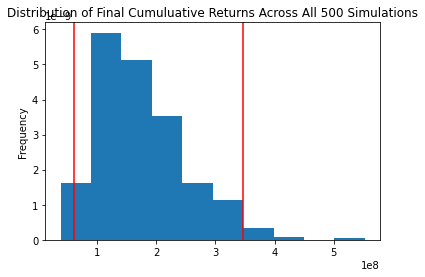

In [36]:
# Plot probability distribution and confidence intervals
MC_sim_dist_plot = MC_thirtyyear.plot_distribution()

### Retirement Analysis

In [37]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_summary_statistics = MC_thirtyyear.summarize_cumulative_return()

# Print summary statistics
print(MC_summary_statistics)

count           5.000000e+02
mean            1.742529e+08
std             7.578826e+07
min             3.788689e+07
25%             1.190580e+08
50%             1.619365e+08
75%             2.144009e+08
max             5.527838e+08
95% CI Lower    5.985985e+07
95% CI Upper    3.457525e+08
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [40]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = MC_summary_statistics[8] * 20000
ci_upper = MC_summary_statistics[9] * 20000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1197196940167.709 and $6915050610741.6045


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [41]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = MC_summary_statistics[8] * 30000
ci_upper = MC_summary_statistics[9] * 30000

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1795795410251.5635 and $10372575916112.406


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

### Ten Years Retirement Option

In [ ]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

In [ ]:
# Plot simulation outcomes
# YOUR CODE HERE!

In [ ]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

# Print summary statistics
# YOUR CODE HERE!

In [ ]:
# Set initial investment
# YOUR CODE HERE!

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")